In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5
fig_height = 4
fig_format = :png
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using Plots  # Para el dibujo de gráficas.
#plotlyjs()  # Para obtener gráficos interactivos.
using SymPy # Para el cálculo simbólico.
using MTH229 # Para restringir la gráfica de una función a su dominio.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.

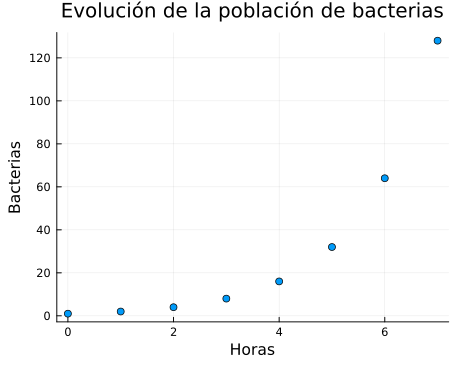

In [3]:
using Plots
horas = 0:7
bacterias = [1, 2, 4, 8, 16, 32, 64, 128]
scatter(horas, bacterias, xlab="Horas", ylab="Bacterias", title="Evolución de la población de bacterias", legend=false)

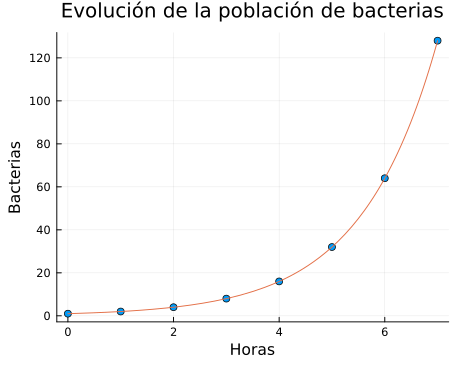

In [4]:
using Plots
plot!(x -> 2^x)

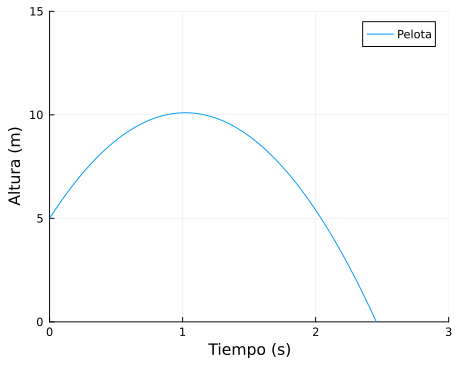

In [5]:
using Plots, SymPy
@vars t  #Declaramos t como una variable simbólica
y₀ = 5
v₀ = 10
const gravedad = -9.8  #Declaramos la gravedad como una constante
y0(t) = y₀+v₀*t+ 1/2*gravedad*t^2
plot(y0, xlims=(0,3), ylims=(0,15), label="Pelota", xlab="Tiempo (s)", ylab="Altura (m)")

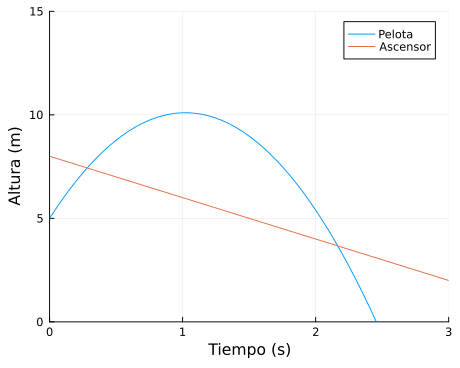

In [6]:
y₁ = 8
v₁ = 2
y1(t) = y₁-v₁*t
plot!(y1, label="Ascensor")

Instantes: Sym[0.282613815574341, 2.16636577626239]

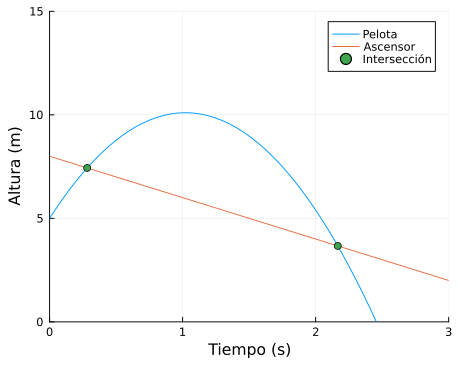

In [7]:
sol = solve(y0(t)-y1(t))
print("Instantes: ", sol)
scatter!(sol, y1.(sol), label="Intersección")

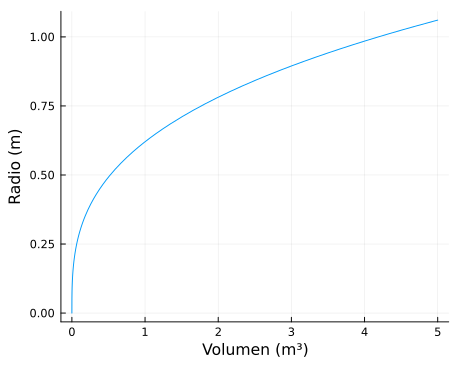

In [8]:
using Plots, SymPy
@vars r v
vol(r) = 4/3*pi*r^3
rad = solve(v-vol(r),r)[1]
plot(rad, xlab="Volumen (m³)", ylab="Radio (m)", legend=false)

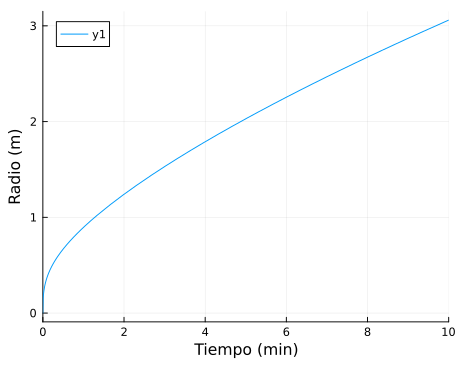

In [9]:
@vars t
vol(t)=t^2+2t
plot(rad∘vol, xlim=(0,10), xlab="Tiempo (min)", ylab="Radio (m)")

In [10]:
sol = solve((rad∘vol)(t)-3)

2-element Vector{Sym}:
 -11.6816354332674
  9.68163543326738

In [11]:
#| echo: false
using Markdown

md"El globo explotará a los $(sol[2]) minutos."

El globo explotará a los 9.68163543326738 minutos.


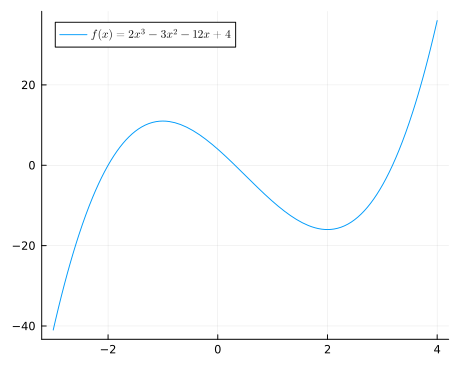

In [12]:
using Plots, LaTeXStrings
f(x) = 2x^3-3x^2-12x+4
plot(f, -3, 4, label=L"$f(x) = 2x^3-3x^2-12x+4$")

In [13]:
using SymPy
@syms x
f(x) = 2x^3-3x^2-12x+4
raices = solve(f(x))  # Solución exacta
print(raices)
N(raices)  # Solución aproximada con decimales

Sym[-2, 7/4 - sqrt(33)/4, sqrt(33)/4 + 7/4]

3-element Vector{Real}:
 -2
  0.313859338365492835037347132945267670444933885504301908075030632358524819635648
  3.186140661634507164962652867054732329555066114495698091924969367641475180364343

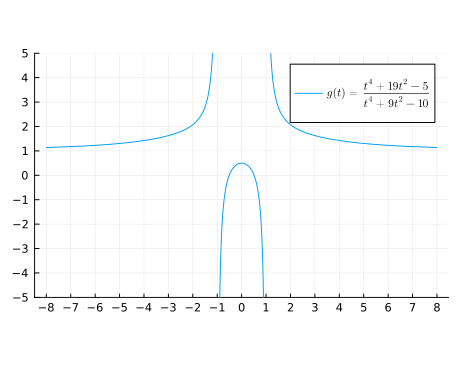

In [14]:
g(t) = (t^4+19t^2-5) / (t^4+9t^2-10)
plot(rangeclamp(g), -8, 8, aspect_ratio=1.0, ylims=(-5,5) , xticks =Vector(-10:10), yticks = Vector(-5:5), label=L"$g(t) = \frac{t^4+19t^2-5}{t^4+9t^2-10}$")

In [15]:
g(-1), g(1)

(Inf, Inf)

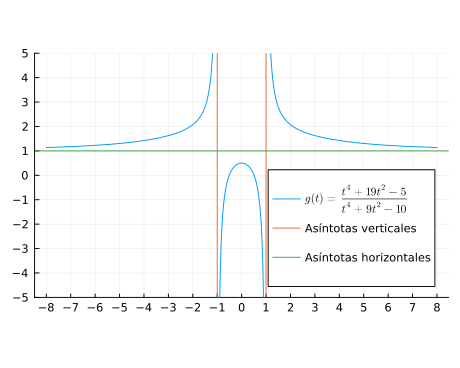

In [16]:
vline!([-1,1], label="Asíntotas verticales")
hline!([1], label="Asíntotas horizontales", legend=:bottomright)

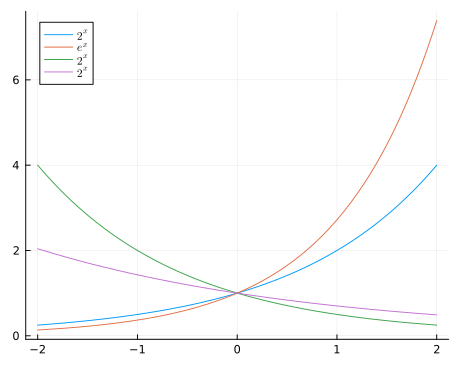

In [17]:
using Plots, LaTeXStrings
plot(2^x, -2, 2, label=L"$2^x$")
plot!(exp(x), label=L"$e^x$")
plot!(0.5^x, label=L"$2^x$")
plot!(0.7^x, label=L"$2^x$")

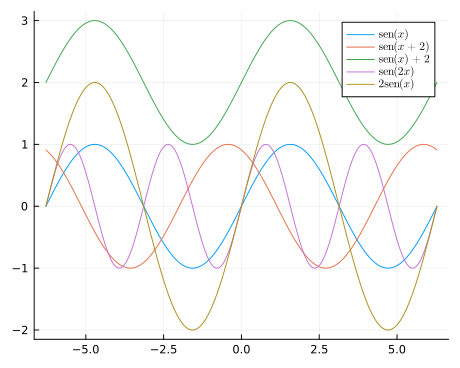

In [18]:
using Plots, LaTeXStrings
plot(sin(x), -2*pi, 2*pi, label=L"$\operatorname{sen}(x)$")
plot!(sin(x+2), label=L"$\operatorname{sen}(x+2)$")
plot!(sin(x)+2, label=L"$\operatorname{sen}(x)+2$")
plot!(sin(2x), label=L"$\operatorname{sen}(2x)$")
plot!(2sin(x), label=L"$2\operatorname{sen}(x)$")

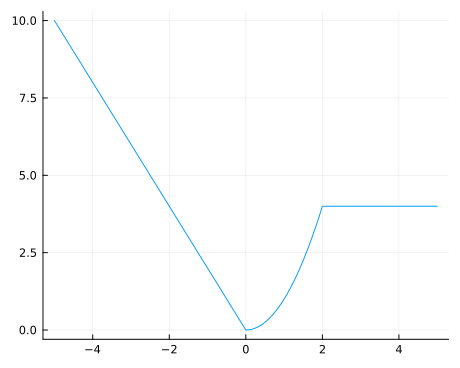

In [19]:
using Plots
h(x) = x<=0 ? -2x : x<=2 ? x^2 : 4
plot(h, legend = false)

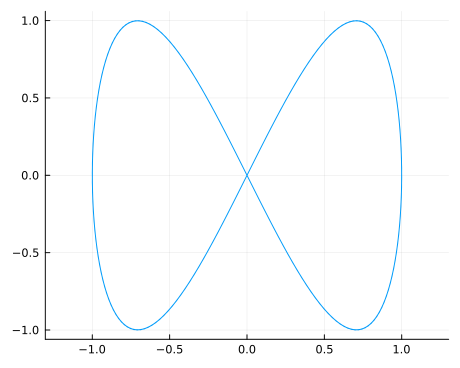

In [20]:
using Plots
u1(t)=sin(t)
v1(t)=sin(2t)
plot(u1, v1, 0, 4pi, aspect_ratio=1.0, legend = false)

In [21]:
#| echo: false
using QuizQuestions
nothing

In [22]:
#| echo: false
choices = (L"$|x|$", L"$2^x$", L"$1/x^2$", L"$\sqrt(x)$", L"$x^4-2x^3+4x$")
answers = [1,5]
multiq(choices, answers)

QuizQuestions.Multiq((L"$\sqrt(x)$", L"$x^4-2x^3+4x$", L"$|x|$", L"$1/x^2$", L"$2^x$"), [2, 3], [1, 2, 3, 4, 5], (L"$\sqrt(x)$", L"$x^4-2x^3+4x$", L"$|x|$", L"$1/x^2$", L"$2^x$"), "", "", "", false)

In [23]:
#| echo: false
using LaTeXStrings
choices = (L"$\mathbb{R}$", L"$\mathbb{R}\setminus\{0\}$", L"$\mathbb{R}^+\cup \{0\}$", L"$\mathbb{R}^+$", "Las otras opciones son falsas." )
answer = 4
radioq(choices, answer)

QuizQuestions.Radioq((L"$\mathbb{R}^+$", L"$\mathbb{R}\setminus\{0\}$", L"$\mathbb{R}$", L"$\mathbb{R}^+\cup \{0\}$", "Las otras opciones son falsas."), 1, [1, 2, 3, 4, 5], (L"$\mathbb{R}^+$", L"$\mathbb{R}\setminus\{0\}$", L"$\mathbb{R}$", L"$\mathbb{R}^+\cup \{0\}$", "Las otras opciones son falsas."), "", "", "", false)

In [24]:
#| echo: false
using LaTeXStrings
choices = (L"$\mathbb{R}$", L"$\mathbb{R}\setminus\{0\}$", L"$\mathbb{R}^+$", L"$\mathbb{R}^-$", "Las otras opciones son falsas." )
answer = 1
radioq(choices, answer)

QuizQuestions.Radioq((L"$\mathbb{R}$", L"$\mathbb{R}^-$", "Las otras opciones son falsas.", L"$\mathbb{R}^+$", L"$\mathbb{R}\setminus\{0\}$"), 1, [1, 2, 3, 4, 5], (L"$\mathbb{R}$", L"$\mathbb{R}^-$", "Las otras opciones son falsas.", L"$\mathbb{R}^+$", L"$\mathbb{R}\setminus\{0\}$"), "", "", "", false)

In [25]:
#| echo: false
using LaTeXStrings
choices = (L"Creciente si $a>1$", L"Creciente si $a<1$", L"Decreciente si $0 < a <1$", L"Creciente si $0 < a < 1$")
answers = [1,3]
multiq(choices, answers)

QuizQuestions.Multiq((L"Creciente si $a>1$", L"Creciente si $0 < a < 1$", L"Creciente si $a<1$", L"Decreciente si $0 < a <1$"), [1, 4], [1, 2, 3, 4], (L"Creciente si $a>1$", L"Creciente si $0 < a < 1$", L"Creciente si $a<1$", L"Decreciente si $0 < a <1$"), "", "", "", false)

In [26]:
#| echo: false
using LaTeXStrings
choices = (L"Cóncava hacia arriba si $a>1$", L"Cóncava hacia abajo si $a<1$", L"Cóncava hacia arriba si $0 < a < 1$", L"Cóncava hacia abajo si $0 < a < 1$")
answers = [2,3]
multiq(choices, answers)

QuizQuestions.Multiq((L"Cóncava hacia arriba si $a>1$", L"Cóncava hacia arriba si $0 < a < 1$", L"Cóncava hacia abajo si $a<1$", L"Cóncava hacia abajo si $0 < a < 1$"), [2, 3], [1, 2, 3, 4], (L"Cóncava hacia arriba si $a>1$", L"Cóncava hacia arriba si $0 < a < 1$", L"Cóncava hacia abajo si $a<1$", L"Cóncava hacia abajo si $0 < a < 1$"), "", "", "", false)

In [27]:
#| echo: false
choices = ("2π y 1", "π y 2", "2π y 2", "4π y 1", "4π y 2")
answer = 5
radioq(choices, answer)

QuizQuestions.Radioq(("2π y 2", "2π y 1", "4π y 2", "4π y 1", "π y 2"), 3, [1, 2, 3, 4, 5], ("2π y 2", "2π y 1", "4π y 2", "4π y 1", "π y 2"), "", "", "", false)

QuizQuestions.HotspotQ("img/funciones-elementales/graficas-funciones-parametricas.png", (0.5, 1), (0.5, 1), "", "", "", nothing)
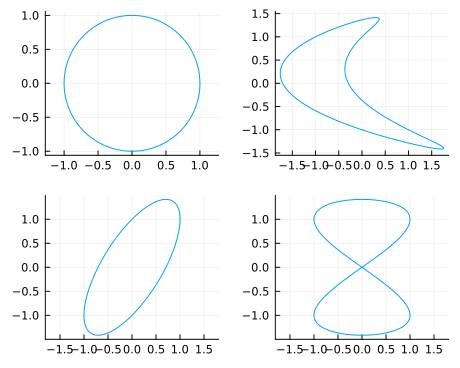

In [28]:
#| echo: false
using Plots
u0(t)=sin(t)
v0(t)=cos(t)
v1(t) = 2cos(t)
v2(t) = sin(t)+cos(t)
u1(t) = sin(2t)-cos(t)
u2(t) = cos(2t)
p1 = plot(u0, v0, 0, 2pi, aspect_ratio=1.0, legend=false)
p2 = plot(u1, v2, 0, 2pi, aspect_ratio=1.0, legend=false)
p3 = plot(u0, v2, 0, 2pi, aspect_ratio=1.0, legend=false)
p4 = plot(u2, v2, 0, 2pi, aspect_ratio=1.0, legend=false)
l = @layout [a b; c d]
p = plot(p1, p2, p3, p4, layout=l)
imgfile = "img/funciones-elementales/graficas-funciones-parametricas.png"
savefig(p, imgfile)
hotspotq(imgfile, (1/2,1), (1/2,1))